# RANDOM FOREST CLASSIFIER

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier(n_estimators=10,criterion='entropy')
cl.fit(x_train,y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred=cl.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.875

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[46,  6],
       [ 4, 24]])

<Axes: >

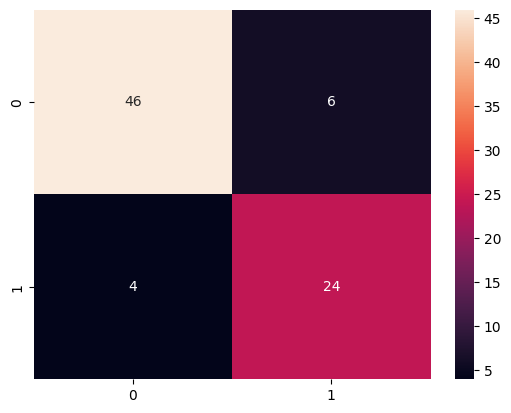

In [13]:
import seaborn as sns
sns.heatmap(cm,annot=True)

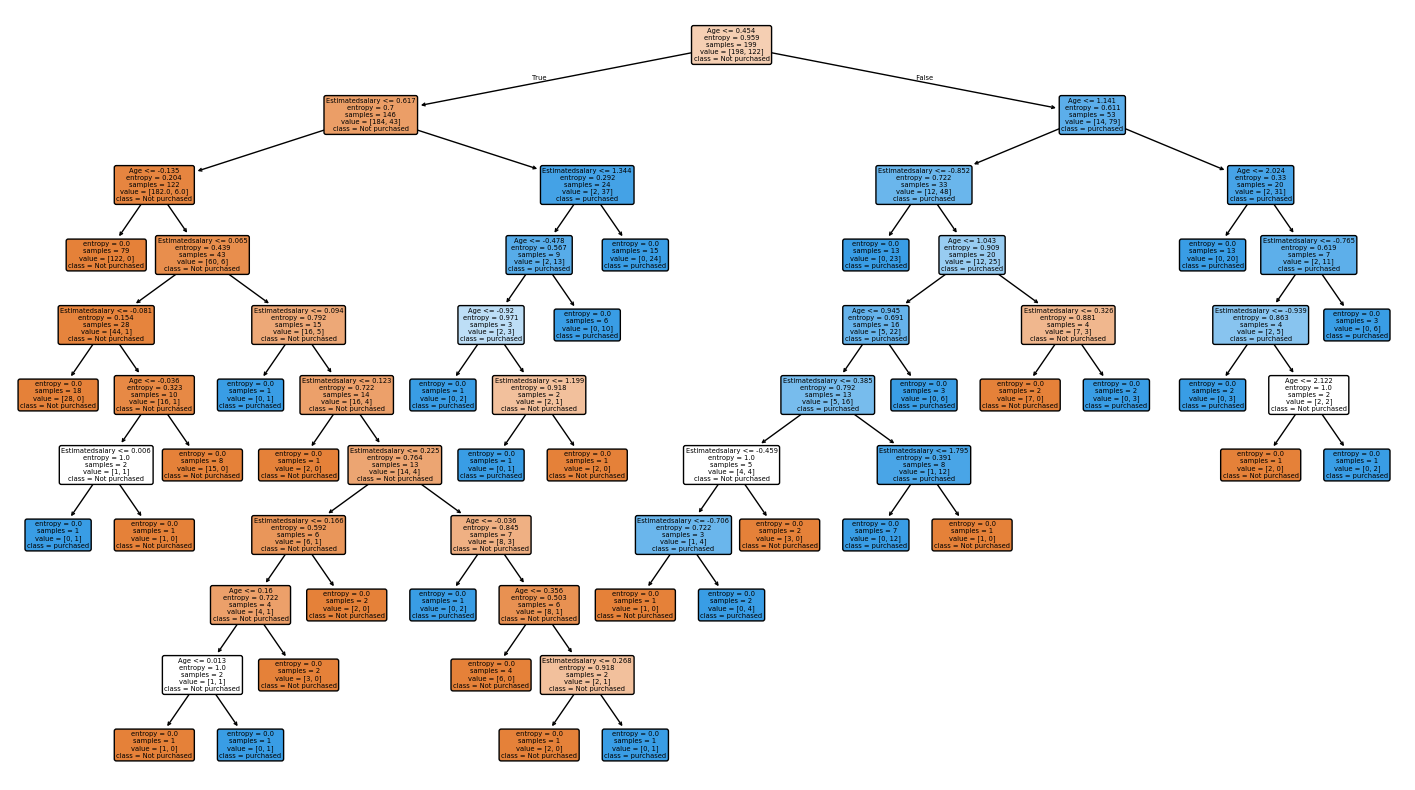

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=cl.estimators_[0] #first tree
plt.figure(figsize=(18,10))
plot_tree(
    single_tree,
    feature_names=['Age','Estimatedsalary'],
    class_names=['Not purchased','purchased'],
    filled=True,
    rounded=True)
plt.show()